# Visualisation and processing of a single signal

##### Library import

In [1]:
# Allow display of images
from IPython.display import display, Image

# Import the required modules
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

# This makes the plots appear inside the notebook
%matplotlib inline

In [2]:
# Tools from brainsignal library
import os
import sys
path=r'C:\Users\Hamon\Documents\Stage\brainsignal'
sys.path.append(path)
import brainsignal.datageneration as dg
import brainsignal.datanalysis as da

# Get data

## Build synthetic data

In [3]:
# time points 
duration=60*4 #s
rate=10 # Hz
spantime=dg.generate_time(duration,rate) 

In [4]:
spantime

array([0.000e+00, 1.000e-01, 2.000e-01, ..., 2.398e+02, 2.399e+02,
       2.400e+02])

### Simple waveforms 

- sinus
- cosinus
- fourier series (sum of sinus and cosinus)
    - chose the coefficients to generate a square shape
    - chose the coefficients to generate a triangular shape

In [5]:
# sinus
signal=dg.generate_sinus(spantime,1,0.1,0) 

[ 0.00000000e+00  6.27905195e-02  1.25333234e-01 ... -1.25333234e-01
 -6.27905195e-02 -5.87830464e-15]


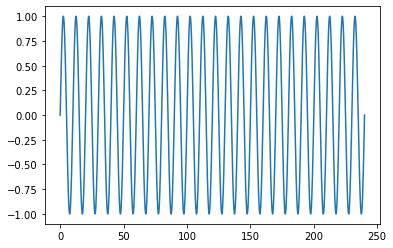

In [6]:
print(signal)
plt.plot(spantime,signal)

In [7]:
#cosinus 
signal=dg.generate_cosinus(spantime,1,0.1,0)

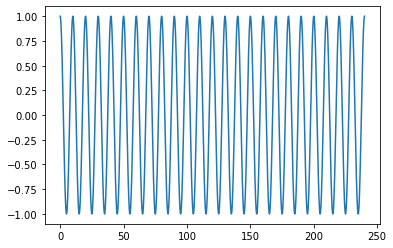

In [8]:
plt.plot(spantime,signal)

# Fourier series

$$f(x)= \displaystyle a_0 + \sum[ \displaystyle a_n\cos(n2\pi ft)+\displaystyle b_n\sin(n2\pi ft)]$$

- square shape 

    Coefficients pour tout n: $a_n=0$
    
    Coefficients si n impair: 
    $b_n=\frac{4*A}{n*pi}$, 
    si n pair: $b_n=0 $


In [10]:
a,b=dg.coeffsquare(5000,1)
signal=dg.generate_fourierseries(spantime,0.05,a,b,5000)

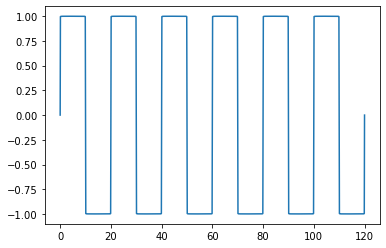

In [11]:
courbe=plt.plot(spantime,signal)

- Triangular shape

    Coefficients pour tout n: $a_n=0$
    
    Coefficients si n impair: $b_n=\frac{8*A}{(n*pi)^2}*(-1)^{(k-1)/2}$

In [16]:
a,b=dg.coefftriangle(5000,1)
signal=dg.generate_fourierseries(spantime,0.025,a,b,5000)

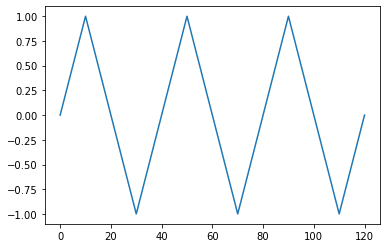

In [17]:
courbe=plt.plot(spantime,signal)

In [9]:
# use print to see what is in the variables
print('time',spantime)
print('signal',signal)

time [0.000e+00 1.000e-01 2.000e-01 ... 2.398e+02 2.399e+02 2.400e+02]
signal [1.         0.99802673 0.9921147  ... 0.9921147  0.99802673 1.        ]


### Blood pressure

In [9]:
# blood pressure
signal=dg.generate_ABP(spantime,120,75,1)

### Intracranial pressure

Todo @Alexandra

### Varying parameters

- sinus/cosinus variation of parameters
- from few measurments of diastolic pressure, systolic pressure and heart rate :
    - fit a smooth function to the data
    - generate the psystolic, pdiastolic and frequency array of size spantime
    - generate a synthetic blood pressure signal 

Text(0, 0.5, 'amplitude')

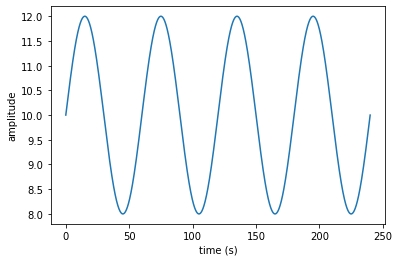

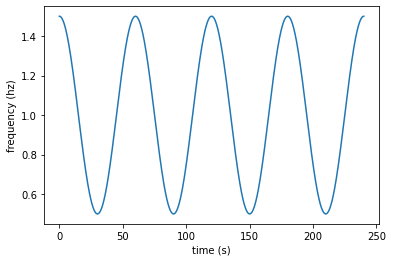

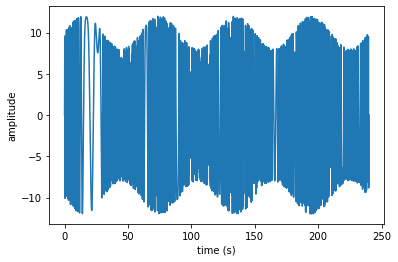

In [10]:
# Varying parameters

# cosine variation of amplitude
amplitude=10*(1+0.2*np.sin(2*np.pi*(1/60)*spantime))

# cosine variation of frequency
frequency=1*(1+0.5*np.cos(2*np.pi*(1/60)*spantime))

plt.figure()
plt.plot (spantime,amplitude)
plt.xlabel('time (s)')
plt.ylabel('amplitude')


plt.figure()
plt.plot (spantime,frequency)
plt.xlabel('time (s)')
plt.ylabel('frequency (hz)')


signal=dg.generate_sinus(spantime,amplitude,frequency,0) 
plt.figure()
plt.plot(spantime,signal)
plt.xlabel('time (s)')
plt.ylabel('amplitude')

[  0  60 120 180 240]
Psys [121.         121.04186739 121.0835808  ... 122.982714   122.99137293
 123.        ]
Pdia [75.         75.04061566 75.08107387 ... 77.99184042 77.9959462
 78.        ]
HB [1.31666667 1.31711443 1.31755959 ... 1.28442959 1.28388286 1.28333333]


Text(0, 0.5, 'amplitude')

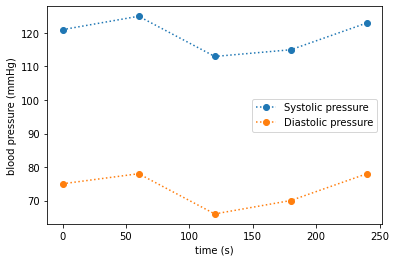

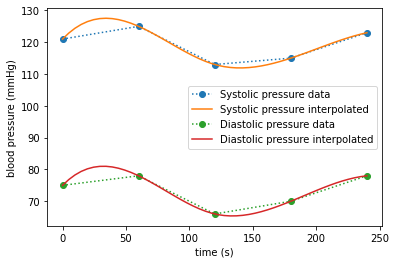

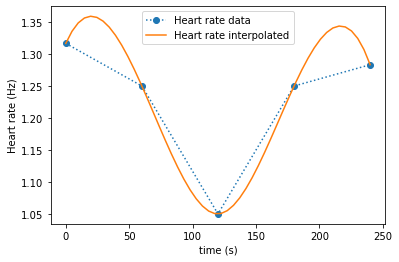

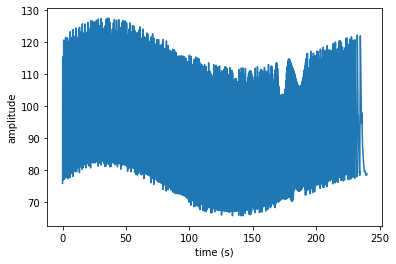

In [11]:
# Blood paramters variation from data points

# datapoints
datatimes=np.array([0,1,2,3,4])*60 # sec #todo : try without np.array() and print the variable : what happens ?
print(datatimes)
dataPsys=np.array([121,125,113,115,123])
dataPdia=np.array([75,78,66,70,78])
dataHB=np.array([79,75,63,75,77])/60  # Hz

# plot the data points with markers (no lines)
plt.figure()
plt.plot(datatimes,dataPsys,'o:',label='Systolic pressure')
plt.plot(datatimes,dataPdia,'o:',label='Diastolic pressure')
# plot pdia and psys on the same plot

# add label and legent
plt.xlabel('time (s)')
plt.ylabel('blood pressure (mmHg)')
plt.legend()


# fit a smooth function to the data
from scipy.interpolate import InterpolatedUnivariateSpline
##Psys interpolation
Psys=InterpolatedUnivariateSpline(datatimes,dataPsys)

##Pdia interpolation 
Pdia=InterpolatedUnivariateSpline(datatimes,dataPdia)


##HB interpolation 
HB=InterpolatedUnivariateSpline(datatimes, dataHB)

# evaluate the function at the time points of spantime
##Psys
print('Psys', Psys(spantime))

##Pdia 
print('Pdia', Pdia(spantime))

##HB
print('HB', HB(spantime))


# plot the data points (as markers) + the fit function (as line)
x=np.linspace(0,240)
plt.figure()
plt.plot(datatimes, dataPsys, 'o:',label='Systolic pressure data')
plt.plot(x,Psys(x),label='Systolic pressure interpolated')

plt.plot(datatimes, dataPdia, 'o:',label='Diastolic pressure data')
plt.plot(x, Pdia(x),label='Diastolic pressure interpolated')

plt.xlabel('time (s)')
plt.ylabel('blood pressure (mmHg)')
plt.legend()

plt.figure()
plt.plot(datatimes, dataHB, 'o:', label='Heart rate data')
plt.plot(x,HB(x), label='Heart rate interpolated')
plt.legend()
plt.xlabel('time (s)')
plt.ylabel('Heart rate (Hz)')


# generate a blood pressure signal with the fitted varying paramters
signal=dg.generate_ABP(spantime,Psys(spantime),Pdia(spantime),HB(spantime))
plt.figure()
plt.plot(spantime,signal)
plt.xlabel('time (s)')
plt.ylabel('amplitude')

## Data loading

In [12]:
# use np.loadtxt 
# ask me for data
datatime, diapatients, diacontrols, syspatients, syscontrols, HRpatients, HRcontrols=np.loadtxt("./data.txt", dtype='float')
print(syspatients)

[121. 123. 123. 125. 126. 125. 117. 115. 114. 113. 111. 111. 111. 111.
 111. 114. 114. 118. 119. 124. 122. 120. 119. 118.]


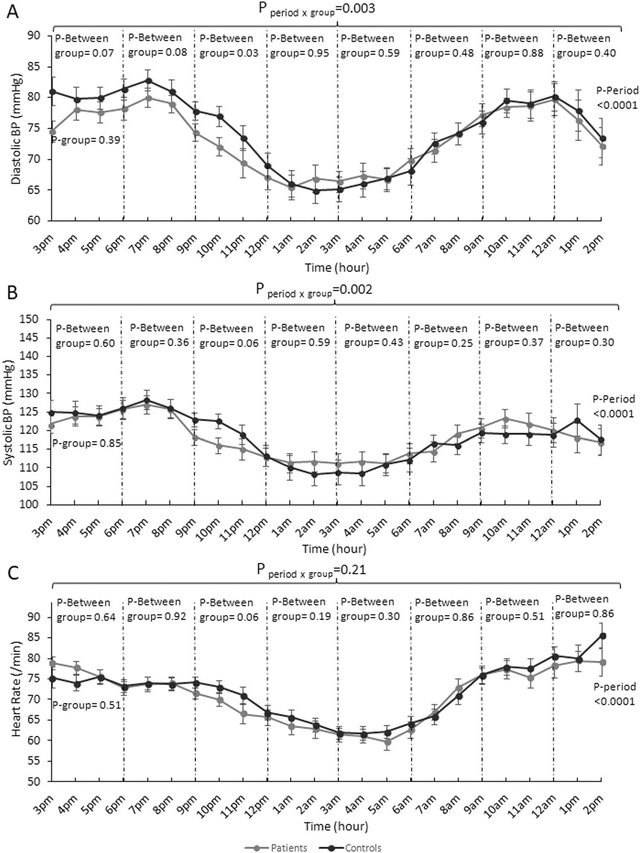

# Data visualisation

#### Time domain visualisation

Text(0, 0.5, 'blood pressure (mmHg)')

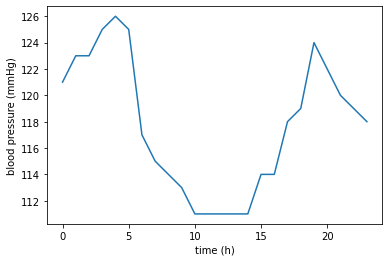

In [13]:
plt.plot(datatime,syspatients)
plt.xlabel('time (h)')
plt.ylabel('blood pressure (mmHg)')


### Frequency domain 
periodogram power spectral density (PSD) estimate

$ \textit{Noticed: Periodogram and spectrogram frequencies go up to fs/2 due to the Nyquist limit}$

##### Different type of window in spectrums
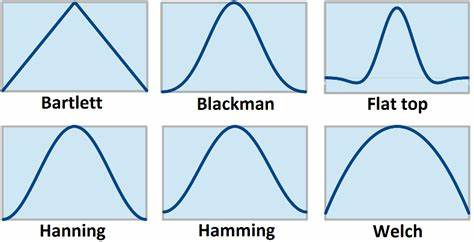

#### Plot window Hanning 

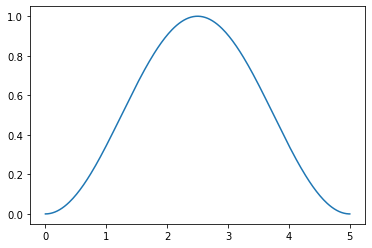

In [47]:
t=np.linspace(0,5,256)
window=sg.windows.hann(256)
plt.plot(t,window)

#### Plot window Blackman

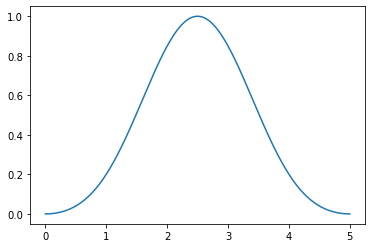

In [54]:
t=np.linspace(0,5,256)
window=sg.windows.blackman(256)
plt.plot(t,window)

Text(0.5, 1.0, 'Sinus spectrum')

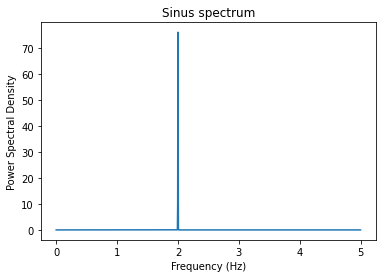

In [14]:
#Synthetic signal 
from scipy import fftpack
from scipy import signal as sg

#Sinus spectrum 
signal=dg.generate_sinus(spantime,1,2,0)
f,Pxx=sg.periodogram(signal,10,'hanning',None ,scaling='density')
plt.plot(f,Pxx)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.title('Sinus spectrum')

Text(0.5, 1.0, 'Periodogram')

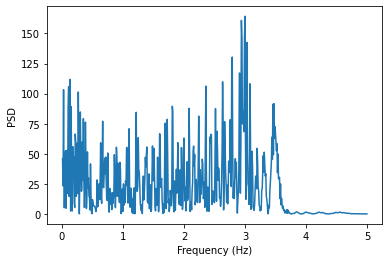

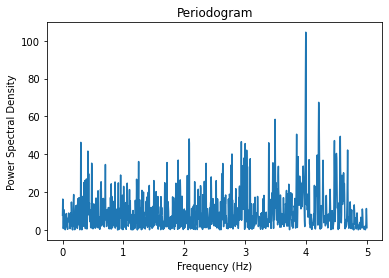

In [30]:
#Varying parameters spectrum 

amplitude=10*(1+0.2*np.sin(2*np.pi*(1/60)*spantime))
frequency=1*(1+0.5*np.cos(2*np.pi*(1/60)*spantime))
signal=dg.generate_sinus(spantime,amplitude,frequency,0)

plt.figure()
indices=da.indexseq(0,120,spantime)
freq,power=da.periodogram(signal[indices],spantime[indices])
da.plot_periodogram(freq,power)


plt.figure()
f,Pxx=sg.periodogram(signal,10,'hanning' ,scaling='density')
plt.plot(f,Pxx)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.title('Periodogram')


Text(0.5, 1.0, 'Periodogram')

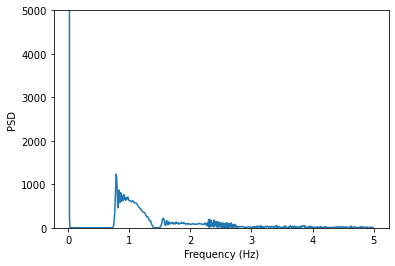

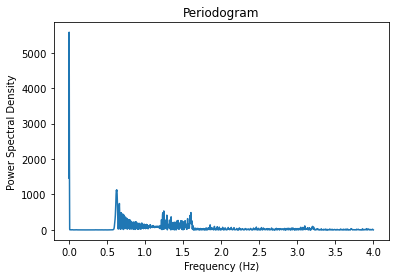

In [16]:
## Blood paramters variation from data points

signal=dg.generate_ABP(spantime,Psys(spantime),Pdia(spantime),HB(spantime))

plt.figure()
indices=da.indexseq(0,120,spantime)
freq,power=da.periodogram(signal[indices],spantime[indices])
da.plot_periodogram(freq,power)
plt.ylim([0,5000])

plt.figure()
f,Pxx=sg.periodogram(signal,da.best_NFFT(120,0.1),'hanning',None ,scaling='density')
plt.plot(f,Pxx)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.title('Periodogram')
#plt.xlim([0,0.5])
#plt.ylim([0,100])

### Spectrogram

Text(0.5, 0, 'Time (sec)')

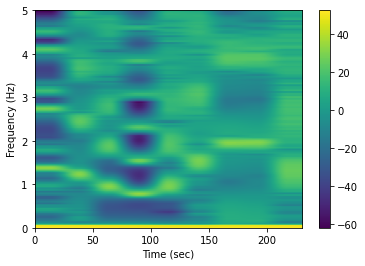

In [17]:
plt.specgram(signal,256,10,window=sg.windows.hann(256),noverlap=0)
plt.colorbar()
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')

# Data processing

## Filtering

###  low pass filter

In [31]:
lowfilter_i=da.lowpassfilter(signal[indices], 10,1)

#### Visualisation after filtering

##### Spectrum 

Text(0.5, 1.0, 'Low pass filter')

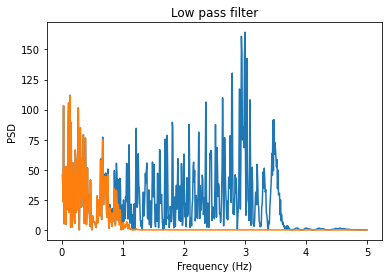

In [32]:
#low pass filter
da.plot_periodogram(freq,power)
freqf,powerf=da.periodogram(lowfilter_i,spantime[indices])
da.plot_periodogram(freqf,powerf)
plt.title('Low pass filter')

##### Signal

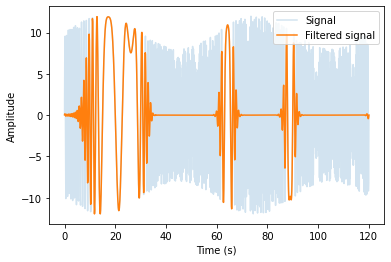

In [33]:
plt.plot(spantime[indices],signal[indices],alpha=0.2, label='Signal')
plt.plot(spantime[indices], lowfilter_i, label='Filtered signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

### high pass filter

In [34]:
highfilter_i=da.highpassfilter(signal[indices], 10, 2.5)

#### Visualisation after filtering

##### Spectrum 

Text(0.5, 1.0, 'High pass filter')

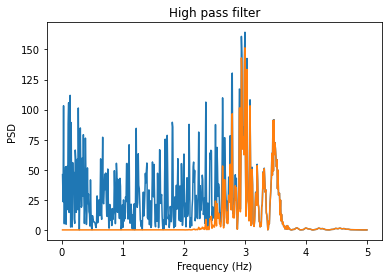

In [35]:
#high pass filter 
da.plot_periodogram(freq,power)
freqf,powerf=da.periodogram(highfilter_i,spantime[indices])
da.plot_periodogram(freqf,powerf)
plt.title('High pass filter')

##### Signal 

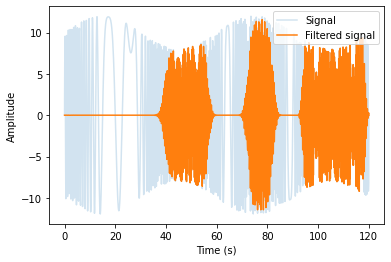

In [36]:
plt.plot(spantime[indices],signal[indices],alpha=0.2, label='Signal')
plt.plot(spantime[indices], highfilter_i, label='Filtered signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

### pass band filter

In [37]:
bandpassfilter_i=da.bandpassfilter(signal[indices], 10,0.5,2)

#### Visualisation after filtering

##### Spectrum 

Text(0.5, 1.0, 'Pass band filter')

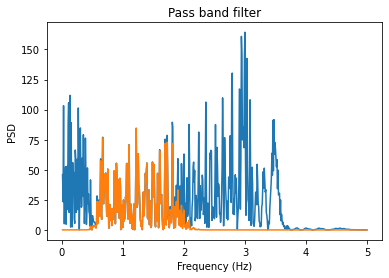

In [38]:
#pass band filter
da.plot_periodogram(freq,power)
freqf,powerf=da.periodogram(bandpassfilter_i,spantime[indices])
da.plot_periodogram(freqf,powerf)
plt.title('Pass band filter')


##### Signal

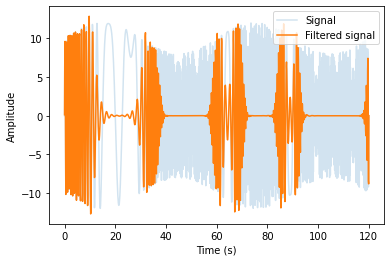

In [39]:
plt.plot(spantime[indices],signal[indices],alpha=0.2, label='Signal')
plt.plot(spantime[indices], bandpassfilter_i, label='Filtered signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

### Spectrum analysis

#### peack detection

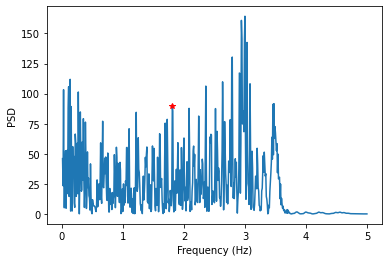

In [40]:
#plot signal periodogram
indices=da.indexseq(0,120,spantime)
freq,power=da.periodogram(signal[indices],spantime[indices])
da.plot_periodogram(freq,power)

#search peak function
peak,index=da.searchpeak(signal[indices],spantime[indices],1,2) #seach peak between 1 and 2 Hz
da.plot_peaks(power, peak, index) #put red star on the top of the peak founded

#### power in given frequency band

In [41]:
power_tot=da.power_in_frequency_band(freq, power, 1, 2) # total power between 1 and 2 Hz

In [42]:
power_tot

2996.1245024355703

#### gaussian fit

### analysis in a moving window + overlay

### Detection of artifacts (moving patient or aquisition pb)

In real data.

### Detection of sleeping stages